<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [2]:
!pip install statsmodels

In [3]:
!pip install numpy

In [4]:
!pip install scipy

In [5]:
!pip install pandas

In [6]:
!pip install sklearn

In [7]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 9.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
!pip install pmdarima

In [12]:
!pip install pyramid

In [19]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose

#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#import cufflinks as cf


In [21]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [22]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=['Date'], index_col='Date')
#df.tail(2018)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2018 entries, 2012-01-03 to 2020-01-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2018 non-null   float64
 1   High       2018 non-null   float64
 2   Low        2018 non-null   float64
 3   Close      2018 non-null   float64
 4   Adj Close  2018 non-null   float64
 5   Volume     2018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.4 KB


In [47]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699.0
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805.0
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412.0
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792.0
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878.0
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813.0


In [48]:
start_date = datetime(2012,1,3)
end_date = datetime(2020,1,9)
lim_df = df[start_date:end_date]
lim_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699.0
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805.0
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412.0
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792.0
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878.0
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813.0


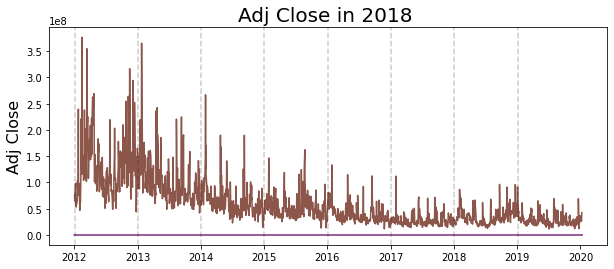

In [49]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Adj Close in 2018 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-03'), color='k', linestyle='--', alpha=0.2)

In [50]:
#first_diff = lim_df.diff()[1:]
first_diff = lim_df.diff()

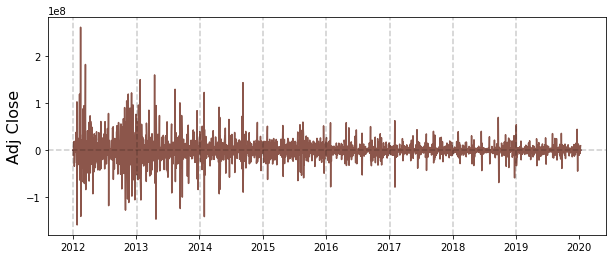

In [51]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 763 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-03'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [52]:
import numpy as np

# Get training and testing sets
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

#train_data = list(df[:train_end]['Adj Close'])
#test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = lim_df[:train_end]['Adj Close']
#test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']

train_data = list(lim_df[:train_end]['Adj Close'])
test_data = list(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])

#test_data = list(df[train_end:test_end]['Adj Close'])

#train_data = df[df.index < '2017-05-05'], df[df.index >= '2012-01-03']
#test_data = df[df.index < '2020-01-09'], df[df.index >= '2017-05-05']

#train_data, test_data = lim_df[lim_df.index < '2012-01-03'], lim_df[lim_df.index >= '2020-01-09']
#print('train shape: ', train_data.shape)
#print('test shape: ', test_data.shape)
print (len(train_data))
print(len(test_data))



1344
674


In [116]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#n_test_ob = len(test_data)
#n_test_ob
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
#plot_acf(test_data, lags= 16, alpha=0.01)
#plot_acf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
#plot_pacf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])


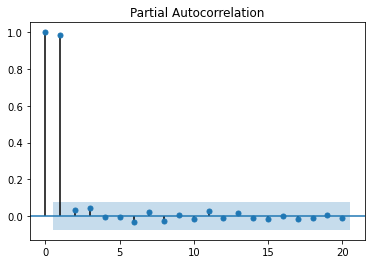

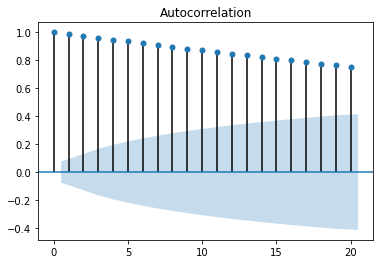

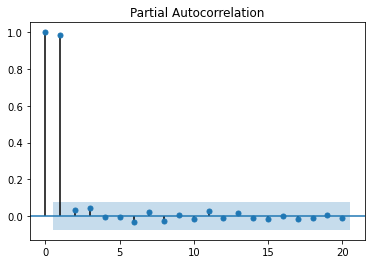

In [120]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
plot_acf(test_data, lags=20, alpha=0.05)
plot_pacf(test_data, lags=20, alpha=0.05)

In [59]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[1.         0.98534526 0.97166676 0.9591563  0.94664175 0.93415916
 0.9208286  0.90832171 0.89501498 0.88248981 0.86969688 0.85775027
 0.8456626  0.83399324 0.82235162 0.81038316 0.79869896 0.78667775
 0.77466535 0.76308303 0.75126769 0.73992844 0.72844931 0.71644819
 0.70462681 0.69354806 0.6827099  0.67108975 0.65923189]
[ 1.          0.98680937  0.02922477  0.03847022 -0.00393628 -0.0038355
 -0.03966584  0.02185665 -0.03903541  0.0229459  -0.01872622  0.02857887
 -0.0135979   0.01497829 -0.00949747 -0.01454629 -0.00208406 -0.01690109
 -0.01173536  0.01175262 -0.01726148  0.01357574 -0.01171084 -0.02700345
 -0.0030571   0.02102566  0.00227963 -0.03360944 -0.01948022]


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


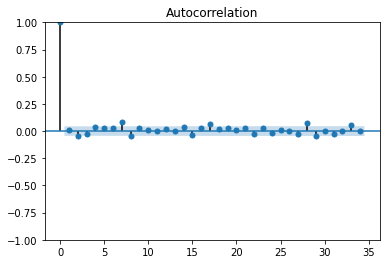

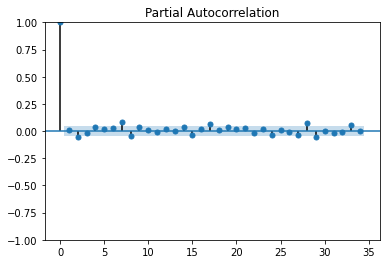

In [121]:
from statsmodels.tsa.stattools import pacf

#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df

#plot ACF
#plot_acf(test_data, lags=30)
#plot_acf(data_df['Adj Close'], lags= 30)
plot_acf(data_df['Adj Close'])

#plot the PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'], lags=30)
plot_pacf(data_df['Adj Close'])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


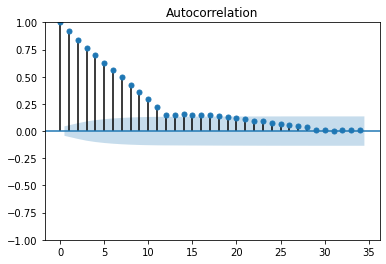

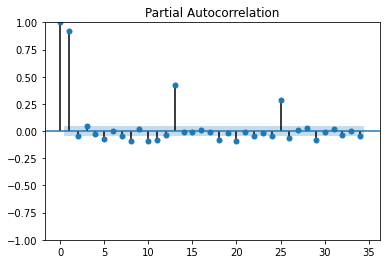

In [123]:
from statsmodels.tsa.stattools import pacf

#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
plot_acf(data_df['Adj Close'])

#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
plot_pacf(data_df['Adj Close'])
plt.show()

In [124]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model_sarima = auto_arima(test_data, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3759.482, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3608.537, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.54 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3761.415, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3535.977, Time=0.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3534.052, Time=0.63 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3606.619, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.18 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3535.967, Time=0.82 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=9.01 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3535.811, T

In [125]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  674
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1764.026
Date:                            Sun, 23 Jan 2022   AIC                           3534.052
Time:                                    16:44:55   BIC                           3547.534
Sample:                                         0   HQIC                          3539.277
                                            - 674                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6139      0.035    -17.585      0.000      -0.682      -0.545
ar.S.L24      -0.3294      0.030    -10.951      0.000      -0.388      -0.270
sigma2        12.0739      0.451     26.758      0.000      11.189      12.958
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               178.75
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

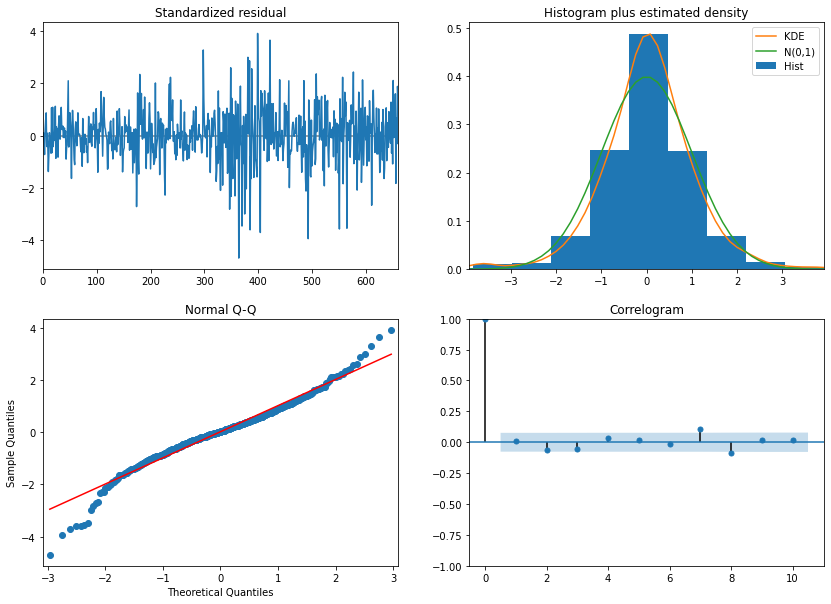

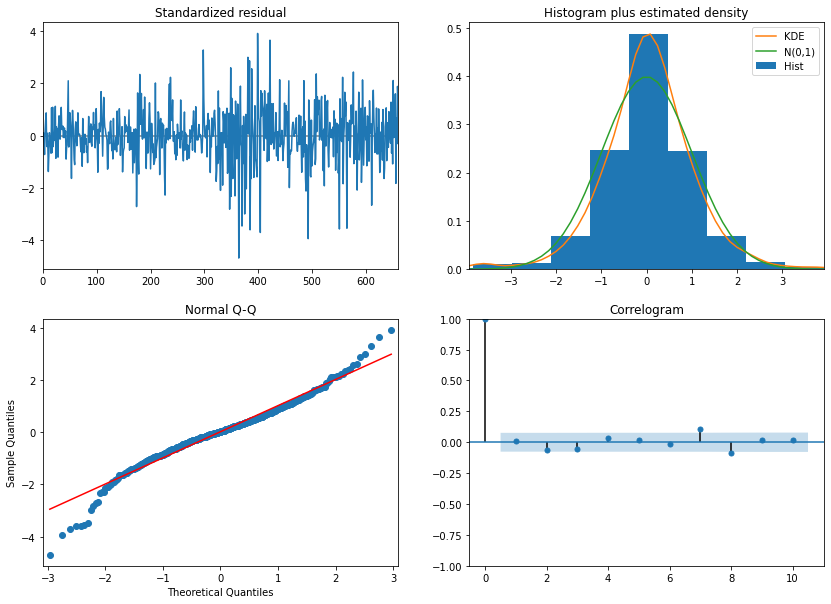

In [126]:
model_sarima.plot_diagnostics(figsize=(14,10))

In [127]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(0,1,0),
                                  seasonal_order=(2,1,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  674
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1704.457
Date:                            Sun, 23 Jan 2022   AIC                           3414.915
Time:                                    16:45:23   BIC                           3428.285
Sample:                                         0   HQIC                          3420.106
                                            - 674                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6213      0.036    -17.310      0.000      -0.692      -0.551
ar.S.L24      -0.3370      0.031   

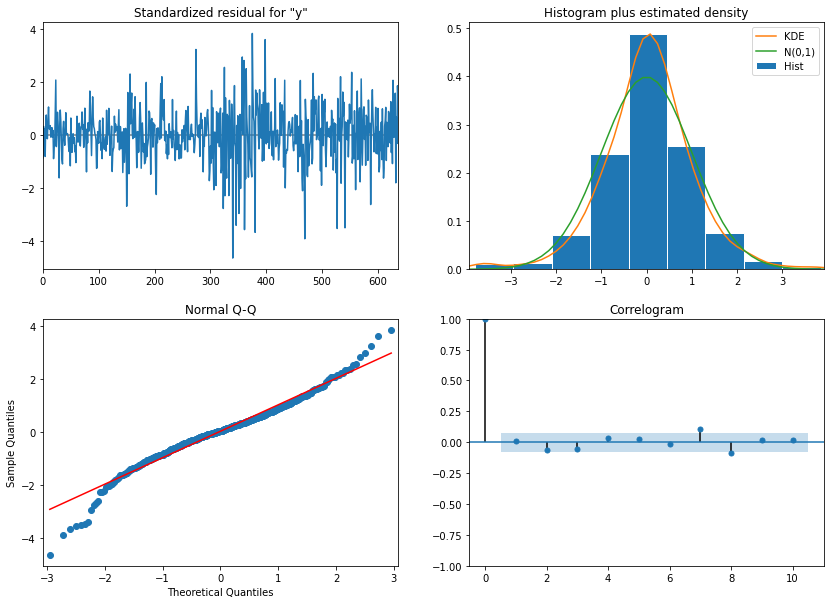

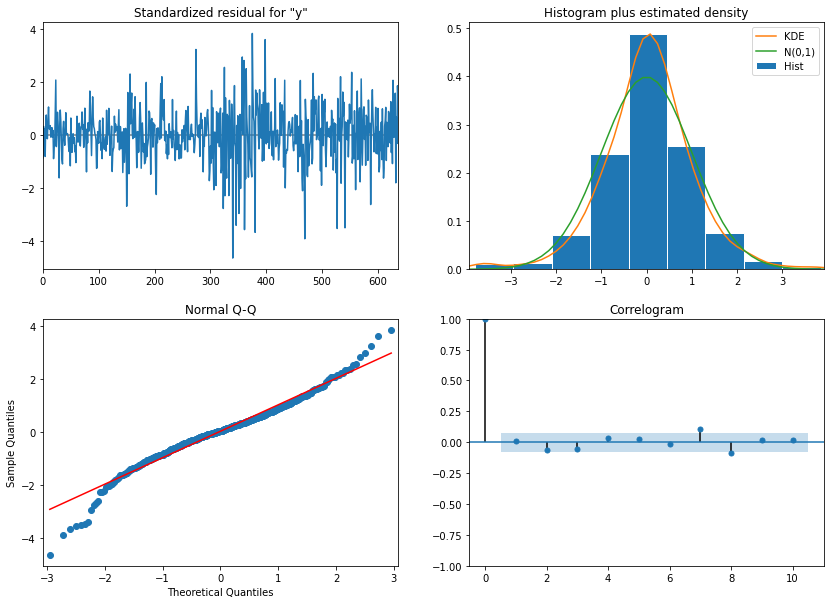

In [63]:
results.plot_diagnostics(figsize=(14,10))

In [128]:
# Get the predictions and residuals
predictions = results.forecast(len(test_data))
#predictions = model_sarima.predict(len(test_data))
print(predictions)
#pred = pd.Series(predictions, index=test_data.index)
pred = pd.Series(predictions, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
residuals = test_data - predictions
residuals

[ 308.86928812  310.14059637  310.15423209  310.15846467  311.3676712
  313.88428323  316.73287101  318.1439416   318.9880754   317.24514633
  317.55153888  320.55798164  324.33764198  326.60118028  326.92867808
  327.41827619  329.12064505  330.90104974  335.08767726  336.3691252
  337.53693757  336.25827074  337.81461673  340.56778751  344.43379915
  345.74230336  347.74613022  347.89618785  349.45679269  351.55506504
  356.17907688  356.09436053  357.56492927  356.11614477  358.38920981
  362.428725    366.05526322  367.62277563  368.47937516  368.67683684
  370.15934395  372.30819925  376.20961519  377.01734672  378.19075414
  376.69122547  378.09783045  381.42350609  385.16972805  386.89812614
  387.90262998  388.18504992  389.76384554  391.77416793  395.97714018
  396.69074566  397.94675865  396.53607814  398.2394965   401.57522796
  405.32778425  406.86895342  408.16812985  408.38179392  409.92708271
  412.00642876  416.26553146  416.73690187  418.04172329  416.5929416
  418.403

array([ -159.38500512,  -159.69890037,  -160.42573209,  -159.60112167,
        -158.7077132 ,  -161.61554523,  -164.68906301,  -171.2050836 ,
        -169.8096844 ,  -167.55819533,  -166.95507288,  -170.14733664,
        -174.37684198,  -176.12205428,  -176.70385508,  -177.13478319,
        -179.72713605,  -181.09677374,  -183.06341626,  -185.8313902 ,
        -186.49062757,  -184.31221074,  -186.24024573,  -194.87094951,
        -202.21846715,  -202.38276036,  -205.78505522,  -206.78598885,
        -210.32205769,  -208.44002904,  -214.36473088,  -213.43896453,
        -215.14425927,  -213.05980977,  -215.78268781,  -221.866179  ,
        -223.43900622,  -227.10914963,  -227.63321416,  -228.33920584,
        -229.24474695,  -232.72363525,  -235.20697519,  -235.15408072,
        -235.86786314,  -234.16295047,  -233.58429545,  -235.66796709,
        -238.90562905,  -240.12551214,  -240.21070498,  -241.15816392,
        -242.80541054,  -243.03584093,  -246.60311718,  -246.61262066,
      

Text(0, 0.5, 'Error')

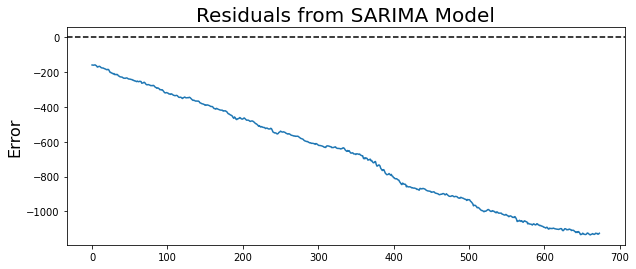

In [129]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)

#plt.plot(test_data)

plt.plot(predictions)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-01-09'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

AttributeError: ignored

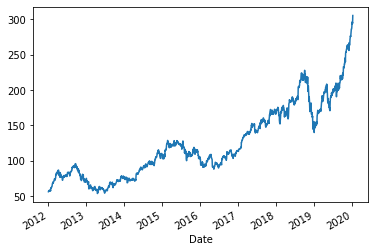

In [162]:
# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)
#forecast_values = model_sarima.get_prediction(steps= 12)
#Prediction summary
forecast_values.summary_frame()


#Prediction
model_predict = forecast_values.predicted_mean

#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)
#ax = results.get_prediction(test_data)

#ax = results.get_forecast(df['Adj Close'])
#plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)

#Axes labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
plt.legend()
plt.show()

In [25]:
# Đánh giá mô hình
print('MAPE', round(np.mean(abs(residuals/test_data)),4))

MAPE nan


In [26]:
print('RMSE', np.sqrt(np.mean(residuals**2)))

RMSE nan


In [ ]:
# Forcast 50 steps ahead
forecast_values = results.get_forecast(steps= 50)

# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

In [ ]:
# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)

#Prediction summary
forecast_values.summary_frame()

In [ ]:
#Prediction
model_predict = forecast_values.predicted_mean

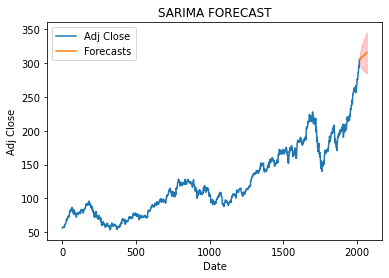

In [ ]:
#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)

#plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)

#Axes labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
y_forecasted = forecast_values.predicted_mean
#y_truth = y['2018-06-01':]
#y_truth = train_data
y_truth = lim_df[train_end:test_end]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
mape = np.mean(np.abs(np.array(model_predict[:-979]) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))